# E4 - Seaborn

In [1]:
# importing libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib as mpl 
import seaborn as sns


In [2]:
import matplotlib
matplotlib.__version__

'3.10.0'

In [3]:
# importing newyork data file

df = pd.read_csv("newyork_data.csv", index_col=0, nrows=1000000, low_memory=False)  # loading the first 1 million rows

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

# Picking one theme (member_casual) and setting it for all plots

<Axes: xlabel='member_casual'>

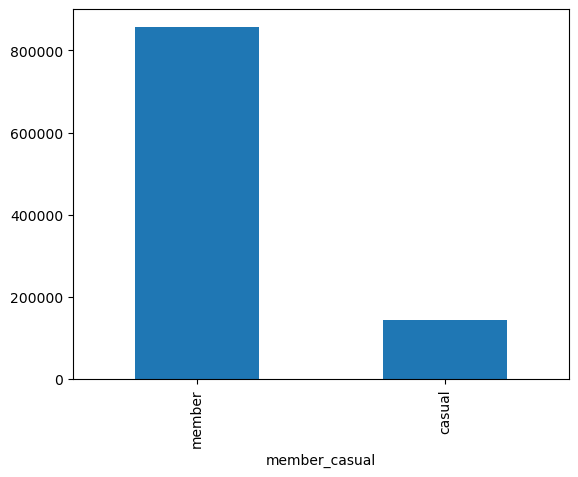

In [6]:
df['member_casual'].value_counts().plot(kind = 'bar')

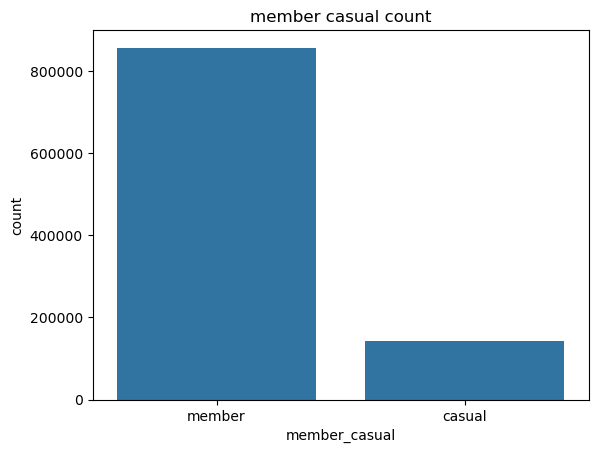

In [7]:
sns.countplot(data = df, x = 'member_casual')
plt.title("member casual count")
plt.show()

### Seaborn visualizations

# Barcharts

In [8]:
df['value'] = 1

In [9]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [10]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,891
1,1 Ave & E 16 St,3025
2,1 Ave & E 18 St,3090
3,1 Ave & E 30 St,1879
4,1 Ave & E 39 St,1908
...,...,...
1523,Wyckoff Av & Stanhope St,572
1524,Wyckoff Ave & Gates Ave,570
1525,Wyckoff St & Nevins St,392
1526,Wythe Ave & Metropolitan Ave,1964


In [11]:
top20 = df_t.nlargest(20, 'value')

In [12]:
top20

,start_station_name,value
1376,W 21 St & 6 Ave,5647
8,1 Ave & E 68 St,4923
652,E 17 St & Broadway,4414
1307,University Pl & E 14 St,4110
380,Broadway & E 21 St,3874
680,E 33 St & 1 Ave,3860
410,Broadway & W 58 St,3843
501,Clinton St & Grand St,3695
261,8 Ave & W 33 St,3632
269,9 Ave & W 22 St,3509


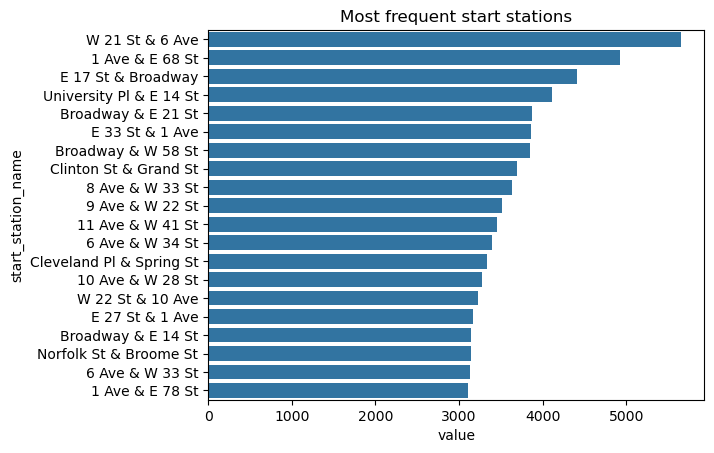

In [13]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

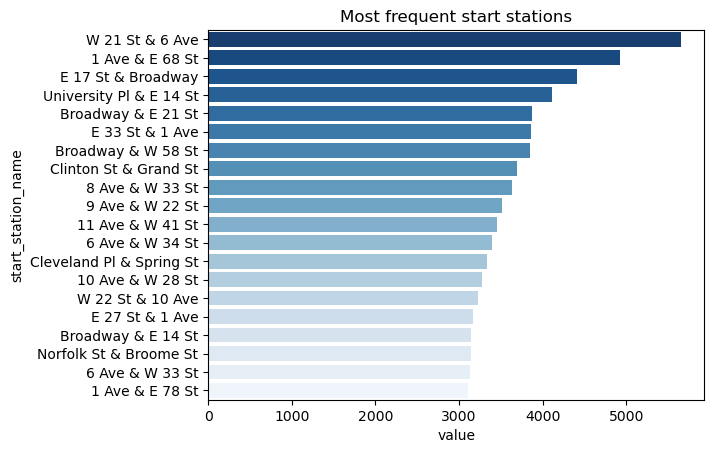

In [14]:
sns.barplot(
    data=top20,
    x='value',
    y='start_station_name',
    hue='start_station_name',        # use station name as hue
    dodge=False,                     # keep bars aligned
    palette="Blues_r",
    legend=False                     # hide legend
)
plt.title("Most frequent start stations")
plt.show()


# Recreating the dual-axis line plot from the previous Exercise

In [15]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d') 

In [16]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [17]:
df_group.head()

,date,ride_id
0,2021-07-22,1
1,2021-09-13,1
2,2021-11-07,1
3,2021-11-09,1
4,2021-11-13,1


In [18]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = '_merge_flag')
print(df['_merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge_flag
both          1000000
left_only           0
right_only          0
Name: count, dtype: int64
Shape of January 1st is (19980, 19)
Shape of January 2nd is (42122, 19)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       '_merge_flag'],
      dtype='object')


In [19]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       '_merge_flag'],
      dtype='object')

In [20]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,value,bike_rides_daily,_merge_flag
date,,,,,,,,,,,,,,,,,,
2021-07-22,2F298092D779509A,classic_bike,2021-07-22 11:49:56.126,2022-01-21 13:15:37.645,Stanton St & Norfolk St,5445.07,Pier 40 Dock Station,SYS035,40.720747,-73.986274,40.728660,-74.011980,casual,NaN,left_only,1,1,both
2021-09-13,84EA4DA50AC94A38,classic_bike,2021-09-13 10:30:02.129,2022-01-20 08:18:25.716,E 14 St & Avenue B,5736.09,58 St & 2 Ave - Brooklyn Army Terminal Vaccina...,3138.09,40.729387,-73.977724,40.644512,-74.021506,casual,NaN,left_only,1,1,both
2021-11-07,4D62825A6FC8FB5C,classic_bike,2021-11-07 11:15:10.792,2022-01-16 00:59:11.717,Hazen St & 20 Ave,7032.06,Brook Ave & E 138 St,7707.08,40.772092,-73.895166,40.807408,-73.919240,casual,NaN,left_only,1,1,both
2021-11-09,218009D78518E321,classic_bike,2021-11-09 17:38:12.125,2022-01-15 11:39:13.470,Central Park North & Adam Clayton Powell Blvd,7617.07,NaN,NaN,40.799484,-73.955613,NaN,NaN,casual,NaN,left_only,1,1,both
2021-11-13,8BF20A472C20229F,classic_bike,2021-11-13 09:15:29.510,2022-01-03 08:24:16.684,Grand Concourse & E 164 St,8057.02,Fulton St & Pearl St,5024.09,40.829608,-73.921461,40.707722,-74.004386,casual,NaN,left_only,1,1,both


In [21]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       '_merge_flag'],
      dtype='object')

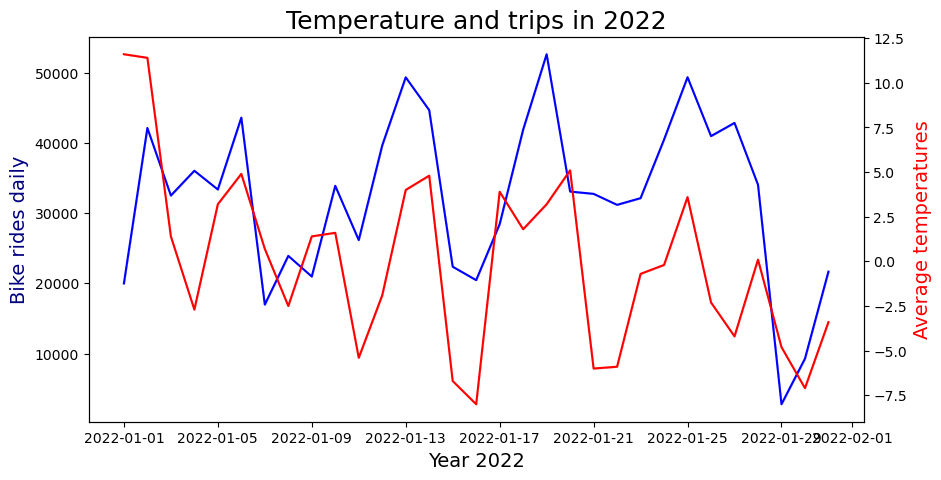

In [24]:
# Filtering for 2022 using dt.year
df_temp_2022 = df_temp[df_temp.index.year == 2022]

fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp_2022['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp_2022['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### creating a box plot of one of the categorical variables (member_casual) in my data set.

In [25]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily               int64
_merge_flag                 category
dtype: object

In [26]:
df['member_casual']

0         casual
1         casual
2         casual
3         casual
4         casual
           ...  
999995    member
999996    member
999997    member
999998    casual
999999    member
Name: member_casual, Length: 1000000, dtype: object

In [27]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', '_merge_flag'],
      dtype='object')

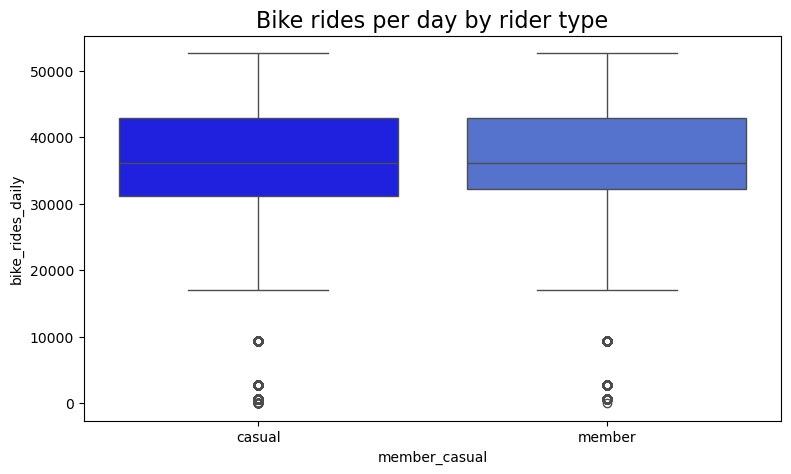

In [29]:
plt.figure(figsize=(9,5))
sns.boxplot(
    x='member_casual',
    y='bike_rides_daily',
    data=df,
    hue='member_casual',   # assign hue
    dodge=False,           # keeps 1 box per category
    palette={'member': 'royalblue', 'casual': 'blue'},
    legend=False           # avoids duplicate legend
)
plt.title("Bike rides per day by rider type", fontsize=16)
plt.show()


# A box plot shows how the data is spread for the bike rides daily by member casual: the box is the middle range, the line inside is the median, the whiskers show most other values, and dots are outliers. Here, daily bike rides look very similar between member types.

# For a Violin plot

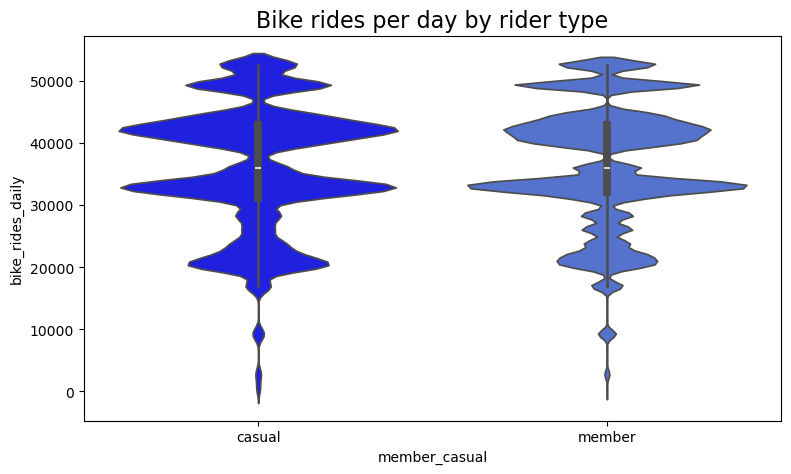

In [31]:
plt.figure(figsize=(9,5))
sns.violinplot(
    x='member_casual',
    y='bike_rides_daily',
    data=df,
    hue='member_casual',   # explicitly assign hue
    dodge=False,           # keep one violin per category
    palette={'member': 'royalblue', 'casual': 'blue'},
    legend=False           # avoid duplicate legend
)
plt.title("Bike rides per day by rider type", fontsize=16)
plt.show()


# Strip plots

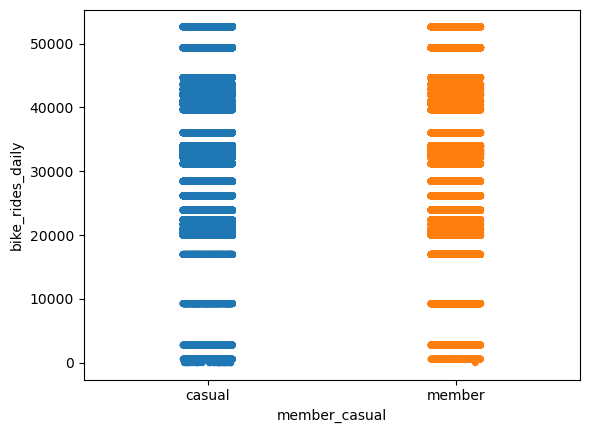

In [33]:
sns.stripplot(x = 'member_casual', y = 'bike_rides_daily', data = df, hue = 'member_casual')
plt.show()

In [34]:
sns.reset_orig()

## Creating a FacetGrid

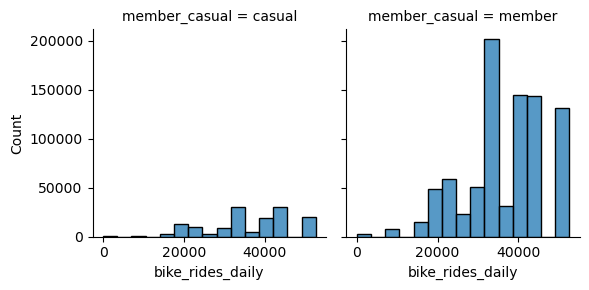

In [35]:
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "bike_rides_daily", bins = 15)
plt.show()

# The plot shows the distribution of daily bike rides for casual versus member riders. Members consistently have higher daily ride counts, with most days ranging between 30,000 and 50,000 rides, while casual riders tend to have lower counts, mostly below 40,000. This suggests that members contribute the majority of rides on a daily basis compared to casual users.